<a href="https://colab.research.google.com/github/pritul2/Detection-of-Person-With-or-Without-Mask/blob/master/xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications.xception import Xception
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D,GlobalAveragePooling2D,AveragePooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

base_model = Xception(weights='imagenet',include_top=False,input_shape=(299, 299, 3)) #include_top ---> not keeping complete Model

headModel = base_model.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)



model = Model(inputs=base_model.input, outputs=headModel)


for layer in base_model.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = optimizers.Adam(lr=1e-4)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


Using TensorFlow backend.


83689472/83683744 [==============================] - 6s 0us/step
[INFO] compiling model...


In [0]:
import os
total_train  = len(os.listdir("/content/CROPPED_train/withmask_cropped")) + len(os.listdir("/content/CROPPED_train/without_mask2_output"))

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [0]:
import numpy as np
train_generator = train_datagen.flow_from_directory('/content/CROPPED_train',target_size=(299,299),batch_size = 16,seed=np.random.seed())

Found 104 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    epochs=5,
    steps_per_epoch=total_train//16)

Epoch 1/5
6/6 [==============================] - 41s 7s/step - loss: 0.8270 - accuracy: 0.4659
Epoch 2/5
6/6 [==============================] - 43s 7s/step - loss: 0.7240 - accuracy: 0.6250
Epoch 3/5
6/6 [==============================] - 36s 6s/step - loss: 0.5502 - accuracy: 0.7250
Epoch 4/5
6/6 [==============================] - 39s 7s/step - loss: 0.4754 - accuracy: 0.8182
Epoch 5/5
6/6 [==============================] - 43s 7s/step - loss: 0.3915 - accuracy: 0.8438


In [0]:
!unzip /content/CROPPED_train.zip

In [0]:
model.save("xception_mask.h5")

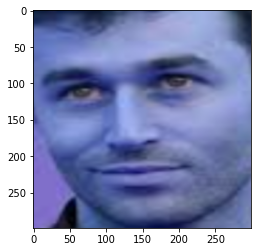

1


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread("/content/CROPPED_train/without_mask2_output/57.png")
img  = cv2.resize(img,(299,299))
plt.imshow(img)
plt.show()
temp_img = img/255.0
preds = model.predict(np.expand_dims(temp_img, axis=0))[0]
#y= model.predict(img[np.newaxis,...])
i = np.argmax(preds)
print(i)

In [0]:
!unzip CROPPED_train.zip

Archive:  CROPPED_train.zip
   creating: CROPPED_train/
   creating: CROPPED_train/withmask_cropped/
  inflating: CROPPED_train/withmask_cropped/withmask30.png  
   creating: __MACOSX/
   creating: __MACOSX/CROPPED_train/
   creating: __MACOSX/CROPPED_train/withmask_cropped/
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask30.png  
  inflating: CROPPED_train/withmask_cropped/withmask24.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask24.png  
  inflating: CROPPED_train/withmask_cropped/withmask18.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask18.png  
  inflating: CROPPED_train/withmask_cropped/withmask19.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask19.png  
  inflating: CROPPED_train/withmask_cropped/withmask25.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._withmask25.png  
  inflating: CROPPED_train/withmask_cropped/withmask31.png  
  inflating: __MACOSX/CROPPED_train/withmask_cropped/._with